<a href="https://colab.research.google.com/github/dimou-gk/Deep-dive-ML/blob/main/Semi_Supervised_%26_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [80]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset & Analysis

In [82]:
df = pd.read_csv('/content/drive/MyDrive/MSc Data and Web Science/Machine Learning/Exercise 4 & 5/wine-missing.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Create Plots

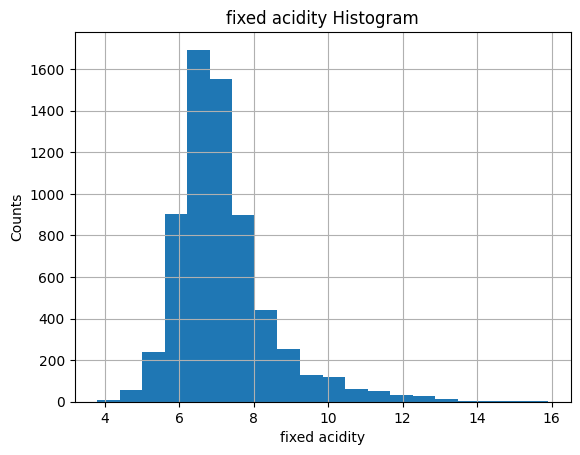

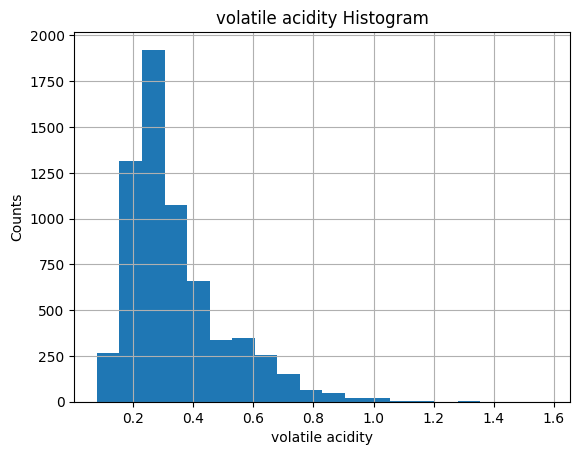

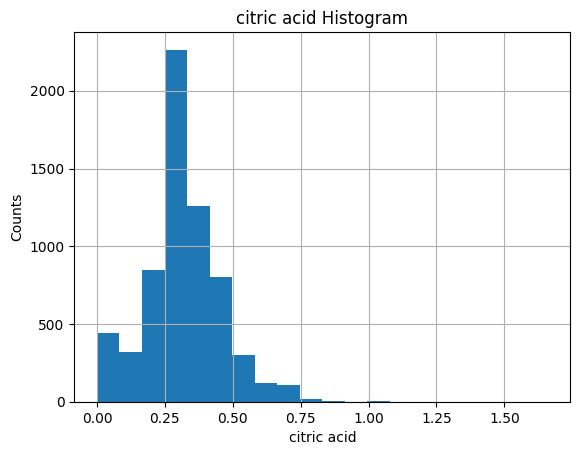

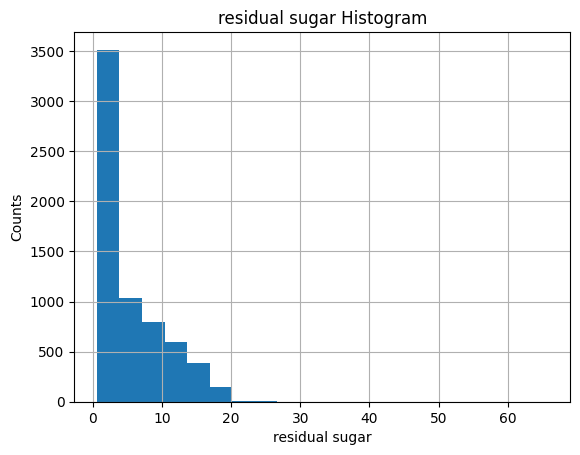

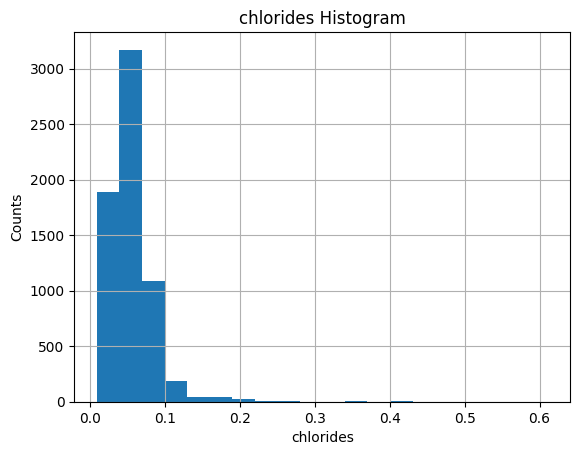

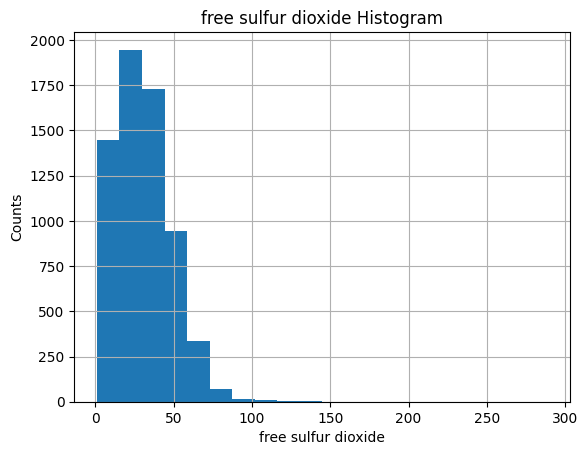

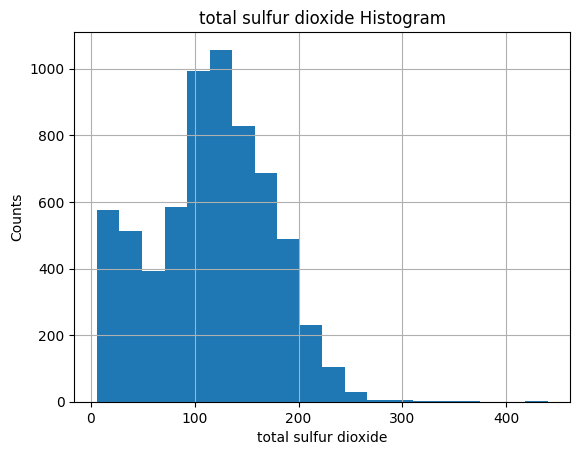

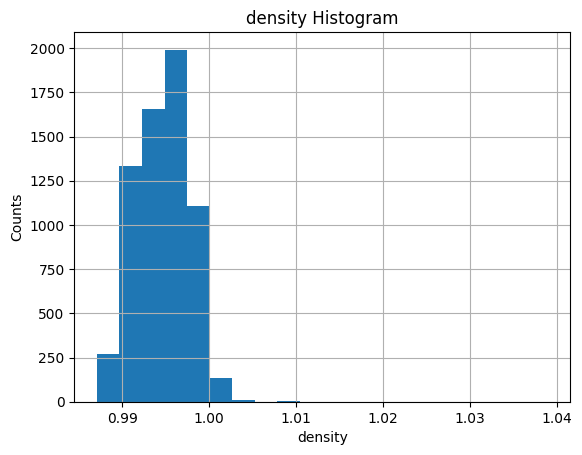

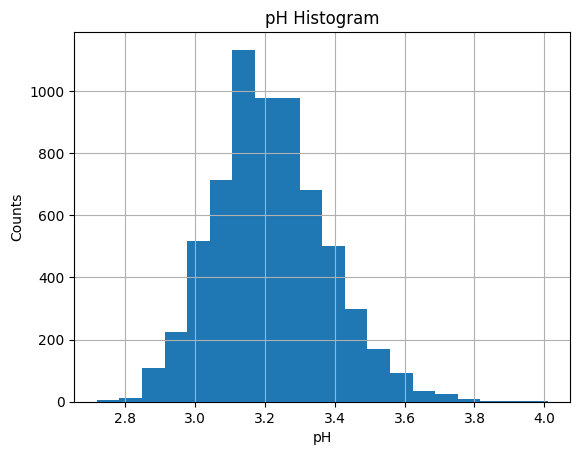

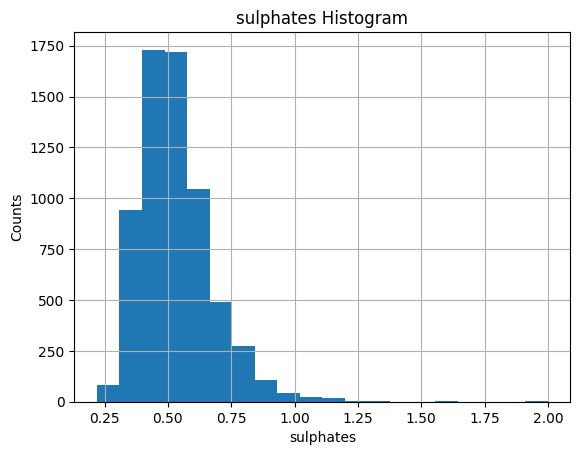

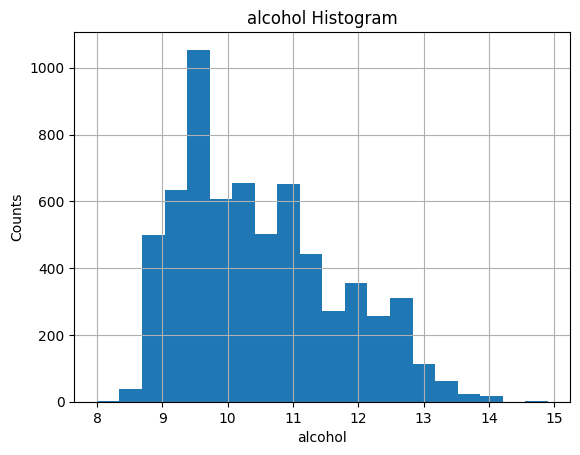

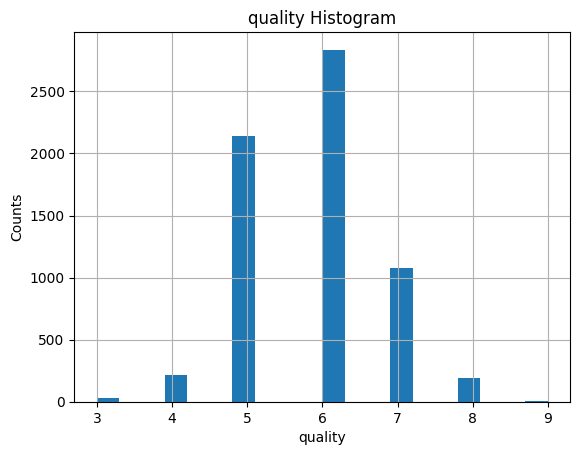

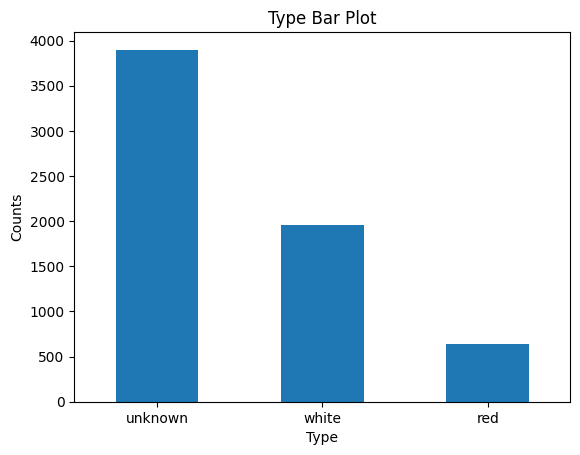

In [83]:
#Print Histograms
def plot_hist(df: DataFrame, exclusion: str):
  # print('---------------------------------------------------------------------------------------------------------')
  # print('Plots for train set') if train else print(f'Plots for test set')
  for column in df.columns:
    if column != exclusion:
      df[column].hist(bins=20)
      plt.title(f'{column} Histogram')
      plt.xlabel(f'{column}')
      plt.ylabel('Counts')
      plt.show()
      print('\n')

plot_hist(df, 'type')

#For Type column display a bar plot
df['type'].value_counts().plot.bar()
plt.title('Type Bar Plot')
plt.xlabel('Type')
plt.xticks(rotation=0) #fix rotation of x axis
plt.ylabel('Counts')
plt.show()

# 2-4. Preprocessing & Data Spliting

In [84]:
df.loc[df['type'] == 'unknown','type'] = 2
df.loc[df['type'] == 'red','type'] = 1
df.loc[df['type'] == 'white','type'] = 0

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
x = df.drop(columns='type').to_numpy()
y = df['type'].to_numpy()

x.shape, y.shape

((6497, 12), (6497,))

In [86]:
x_known = []
y_known = []
x_unknown = []

for i in range(len(x)):
  if y[i] == 2:
    x_unknown.append(x[i])
  else:
    x_known.append(x[i])
    y_known.append(y[i])

x_unknown = np.array(x_unknown)
x_known = np.array(x_known)
y_known = np.array(y_known)

x_unknown.shape, x_known.shape, y_known.shape

((3898, 12), (2599, 12), (2599,))

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size = 0.3, random_state = 0, stratify = y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

# 5-6. Training

In [88]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of our model is: {accuracy}')
print(f'Precision of our model is: {precision}')
print(f'Recall of our model is: {recall}')
print(f'F1-Score of our model is: {f1}')

Accuracy of our model is: 0.9935897435897436
Precision of our model is: 0.9895287958115183
Recall of our model is: 0.984375
F1-Score of our model is: 0.9869451697127938


For imbalanced datasets using F1-Score is more representative than accuracy. This is because it provides a much better indication on how well our model is performing on both the majority and minority classes. Accuracy as a metric will more than likely give us optimistic results solely based on predictions made in the majority class.

In [89]:
model = RandomForestClassifier(class_weight = 'balanced', random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of our model with class weight balanced is: {accuracy}')
print(f'Precision of our model with class weight balanced is: {precision}')
print(f'Recall of our model with class weight balanced is: {recall}')
print(f'F1-Score of our model with class weight balanced is: {f1}')

Accuracy of our model with class weight balanced is: 0.9948717948717949
Precision of our model with class weight balanced is: 0.9895833333333334
Recall of our model with class weight balanced is: 0.9895833333333334
F1-Score of our model with class weight balanced is: 0.9895833333333334


Mode 'balanced' is used to automatically adjust the weights using values of y. This is done in a inverse propositional to the class frequencies manner.

# 7-9. Semi-Supervised and Retraining

In [90]:
y_unknown_proba=model.predict_proba(x_unknown)

y_unknown_pred = np.where(y_unknown_proba[:, 1] > 0.7, 1,
                          np.where(y_unknown_proba[:, 0] < 0.3, 0, 2))

mask = y_unknown_pred != 2

x_unknown_filtered = x_unknown[mask]
y_unknown_pred_filtered = y_unknown_pred[mask]

x_unknown_filtered.shape, y_unknown_pred_filtered.shape

((899, 12), (899,))

In [91]:
x_train_concat = np.concatenate((x_train, x_unknown_filtered))
y_train_concat = np.concatenate((y_train, y_unknown_pred_filtered))

In [92]:
model = RandomForestClassifier(class_weight = 'balanced', random_state=0)
model.fit(x_train_concat, y_train_concat)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of our model with class weight balanced is: {accuracy}')
print(f'Precision of our model with class weight balanced is: {precision}')
print(f'Recall of our model with class weight balanced is: {recall}')
print(f'F1-Score of our model with class weight balanced is: {f1}')

Accuracy of our model with class weight balanced is: 0.9935897435897436
Precision of our model with class weight balanced is: 0.9895287958115183
Recall of our model with class weight balanced is: 0.984375
F1-Score of our model with class weight balanced is: 0.9869451697127938


From what we can see from the results the already (almost) perfect performance of our algorithms didnt seem to improve by a significant margin. We also have a small decrease in Recall and F1-Score

---



# Section 2 Model Evaluation

In [93]:
df = pd.read_csv('/content/drive/MyDrive/MSc Data and Web Science/Machine Learning/Exercise 4 & 5/wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


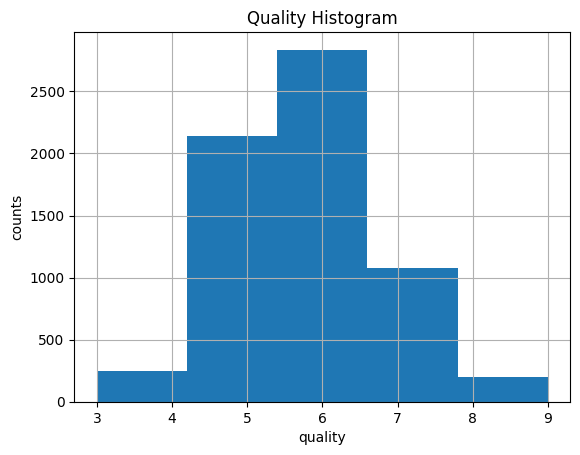

In [94]:
df['quality'].hist(bins=5)
plt.title('Quality Histogram')
plt.xlabel('quality')
plt.ylabel('counts')
plt.show()

From what we can see in the histogram our examples follow a normal distribution, where most of our wines have mediocre quality, ranging from 4 to 7 and very view observations exist on the "bad" and "good" quality wines.

## 2-3. Analysis

In [95]:
import seaborn as sns
from scipy.stats import ttest_ind

red_wine = df[df['type'] == 'red']
white_wine = df[df['type'] == 'white']

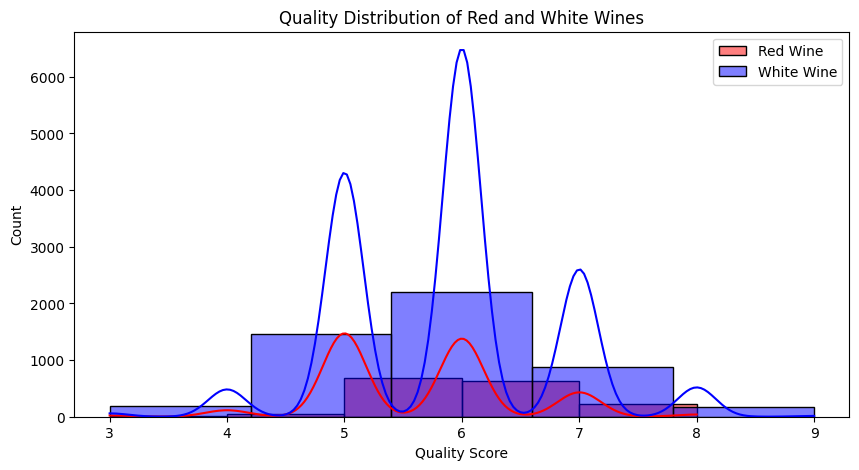

In [96]:
plt.figure(figsize=(10, 5))
sns.histplot(red_wine['quality'], color='red', label='Red Wine', kde=True, bins=5)
sns.histplot(white_wine['quality'], color='blue', label='White Wine', kde=True, bins=5)
plt.title('Quality Distribution of Red and White Wines')
plt.xlabel('Quality Score')
plt.legend()
plt.show()

The plot suggests that, on average, white wines in this dataset might be perceived as slightly better in quality than red wines due to the higher frequency of ratings at 6 and above.

<Axes: xlabel='residual sugar', ylabel='fixed acidity'>

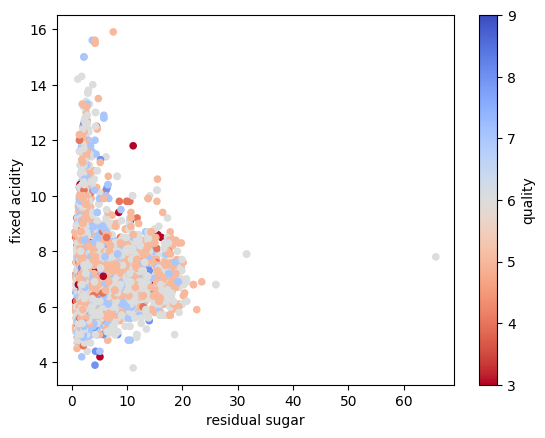

In [97]:
df.plot.scatter(x='residual sugar', y='fixed acidity', c='quality', colormap='coolwarm_r')

From the scatter plot, we can infer that lower quality wines have lower levels of acidicity on all levels of residual sugar. On the other hand, higher quality wines have lower levels of residual sugar and tend to have higher levels of fixed acidity

# 4-5. Data Splitting and Training

In [98]:
#Preprocessing step. Some rows (~30) have NaN in some fields. Because of the:
#   1) Relatively low amount of examples they are removed
#   2) Decision Tree doesnt accept nan we remove them
df.dropna(inplace=True)

In [99]:
df.loc[df['type'] == 'red','type'] = 1
df.loc[df['type'] == 'white','type'] = 0

In [100]:
x = df.drop(columns='quality').to_numpy()
y = df['quality'].to_numpy()

x.shape, y.shape

((6463, 12), (6463,))

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5816, 12), (5816,), (647, 12), (647,))

In [102]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

MAE_score = mean_absolute_error(y_test, y_pred)
NMAE_score = MAE_score/(np.average(y_test))

print(f'Mean absolute error is: {MAE_score}')
print(f'Mean absolute error is: {NMAE_score}')

Mean absolute error is: 0.44049459041731065
Mean absolute error is: 0.07585839765770562


# Data Resplitting and Training

In [103]:
from statistics import stdev, mean

MAE_scores = []
NMAE_scores = []

for i in range(1,12):
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=i)

  model = DecisionTreeRegressor(random_state=0)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  MAE_score = mean_absolute_error(y_test, y_pred)
  NMAE_score = MAE_score/(np.average(y_test))

  MAE_scores.append(MAE_score)
  NMAE_scores.append(NMAE_score)

MAE_scores = np.array(MAE_scores)
NMAE_scores = np.array(NMAE_scores)

MAE_score_avg = np.mean(MAE_score)
NMAE_score_avg = np.mean(NMAE_score)

print(f'Mean absolute error\'s average is: {MAE_score_avg}')
print(f'Normalized Mean absolute error\'s average is: {NMAE_score_avg}')

print(f'Standart deviation of Mean absolute error is: {stdev(MAE_scores)}')
print(f'Standart deviation of Normalized Mean absolute error is: {stdev(NMAE_scores)}')

Mean absolute error's average is: 0.44513137557959814
Normalized Mean absolute error's average is: 0.07649402390438248
Standart deviation of Mean absolute error is: 0.029579254969770773
Standart deviation of Normalized Mean absolute error is: 0.005142439903527825


The combination of a relatively low mean error (MAE and NMAE) and low variability (standard deviation) indicates that the Query 5 model is fairly reliable. But there is still some error margin which could be improved

# 6-8. Manually selecting parameters vs Cross Validation

In [104]:
# train, validate, test = np.split(df.sample(frac=1, random_state=0), [int(.7*len(df)), int(.9*len(df))])
# train.shape, validate.shape, test.shape

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4652, 12), (4652,), (1164, 12), (1164,))

In [105]:
from itertools import product

max_depth = [3, 4, 5]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]

results_train = []
results_val = []

counter = 0

for depth, samples_split, samples_leaf in product(max_depth, min_samples_split, min_samples_leaf):
  if counter == 15: break
  model = DecisionTreeRegressor(
      random_state=0,
      max_depth = depth,
      min_samples_split = samples_split,
      min_samples_leaf = samples_leaf)
  model.fit(x_train, y_train)

  y_pred_train = model.predict(x_train)

  MAE_score_train = mean_absolute_error(y_train, y_pred_train)
  NMAE_score_train = MAE_score_train/(np.average(y_train))
  # if tmp_MAE > MAE_score_train:
  #   MAE_score_train = tmp_MAE
  # if tmp_NMAE > NMAE_score_train:
  #   NMAE_score_train = tmp_NMAE

  results_train.append({
      'max_depth': depth,
      'min_samples_split': samples_split,
      'min_samples_leaf': samples_leaf,
      'MAE_score': MAE_score_train,
      'NMAE_score': NMAE_score_train
  })

  counter += 1


counter = 0

for depth, samples_split, samples_leaf in product(max_depth, min_samples_split, min_samples_leaf):
  if counter == 15: break
  model = DecisionTreeRegressor(
      random_state=0,
      max_depth = depth,
      min_samples_split = samples_split,
      min_samples_leaf = samples_leaf)
  model.fit(x_val, y_val)

  y_pred_val = model.predict(x_val)

  MAE_score_val = mean_absolute_error(y_val, y_pred_val)
  NMAE_score_val = MAE_score_val/(np.average(y_val))
  # if tmp_MAE_val > MAE_score_val:
  #   MAE_score_val = tmp_MAE_val
  # if tmp_NMAE_val > NMAE_score_val:
  #   NMAE_score_val = tmp_NMAE_val

  results_val.append({
      'max_depth': depth,
      'min_samples_split': samples_split,
      'min_samples_leaf': samples_leaf,
      'MAE_score': MAE_score_val,
      'NMAE_score': NMAE_score_val
  })

  counter += 1

df_train_results = pd.DataFrame(results_train)
df_val_results = pd.DataFrame(results_val)

train = df_train_results.nlargest(1,['MAE_score', 'NMAE_score']).to_numpy()
val = df_val_results.nlargest(1,['MAE_score', 'NMAE_score']).to_numpy()
# print(df_train_results.nlargest(1,['MAE_score', 'NMAE_score']))
# print(df_val_results.nlargest(1,['MAE_score', 'NMAE_score']))

In [106]:
model = DecisionTreeRegressor(
      random_state=0,
      max_depth = int(train[0][0]),
      min_samples_split = int(train[0][1]),
      min_samples_leaf = int(train[0][2]))
model.fit(x_train, y_train)

y_pred_test_withtrainset = model.predict(x_test)

MAE_score_test_withtrainset = mean_absolute_error(y_test, y_pred_test_withtrainset)
print(f"Mean absolute score on test set using train set best parameters is: {MAE_score_test_withtrainset}")


model = DecisionTreeRegressor(
      random_state=0,
      max_depth = int(val[0][0]),
      min_samples_split = int(val[0][1]),
      min_samples_leaf = int(val[0][2]))
model.fit(x_val, y_val)

y_pred_test_withvalset = model.predict(x_test)

MAE_score_test_withvalset = mean_absolute_error(y_test, y_pred_test_withvalset)
print(f"Mean absolute score on test set using validation set best parameters is: {MAE_score_test_withvalset}")

Mean absolute score on test set using train set best parameters is: 0.5890877580803935
Mean absolute score on test set using validation set best parameters is: 0.5869800076556668


From what we can see in our results, we have better performance in our validation set. Thus it is better to fine-tune our parameters here.

## CV

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=0)

parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['sqrt', 'log2']
}

model = DecisionTreeRegressor(random_state=0)
GridSearch = GridSearchCV(estimator = model, param_grid = parameters, cv=10, n_jobs=4, scoring='neg_mean_absolute_error')

GridSearch.fit(x_train, y_train)

y_pred_Grid = GridSearch.predict(x_test)

MAE_Grid = mean_absolute_error(y_test, y_pred)
NMAE_Grid = MAE_Grid/(np.average(y_train))
print(f'Mean absolute error for Cross Validation is: {MAE_Grid}')
print(f'Normalized Mean absolute error for Cross Validation is: {NMAE_Grid}')

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mean absolute error for Cross Validation is: 0.893353941267388
Normalized Mean absolute error for Cross Validation is: 0.1535023198537913


Based on our results the split of train-validation-test seems to be more appropriate in this particular scenario. However, it is generaly better to split the dataset into train-validation-test when dealing with larger datasets or when computational resources are limited. On the other hand, Cross Validation is better used on small or moderate datasets to get a more reliable performance estimate.

# 11-12. Tree with fix depth & Visualization

In [108]:
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['sqrt', 'log2']
}

model = DecisionTreeRegressor(random_state=0)
GridSearch = GridSearchCV(estimator = model, param_grid = parameters, cv=10, n_jobs=4, scoring='neg_mean_absolute_error')

GridSearch.fit(x_train, y_train)

y_pred_Grid = GridSearch.predict(x_test)

[Text(0.625, 0.9166666666666666, 'residual sugar <= 17.675\nabsolute_error = 0.644\nsamples = 5816\nvalue = 6.0'),
 Text(0.4264705882352941, 0.75, 'citric acid <= 0.235\nabsolute_error = 0.644\nsamples = 5714\nvalue = 6.0'),
 Text(0.5257352941176471, 0.8333333333333333, 'True  '),
 Text(0.23529411764705882, 0.5833333333333334, 'alcohol <= 10.25\nabsolute_error = 0.605\nsamples = 1219\nvalue = 5.0'),
 Text(0.11764705882352941, 0.4166666666666667, 'pH <= 3.005\nabsolute_error = 0.389\nsamples = 754\nvalue = 5.0'),
 Text(0.058823529411764705, 0.25, 'chlorides <= 0.042\nabsolute_error = 0.4\nsamples = 20\nvalue = 6.0'),
 Text(0.029411764705882353, 0.08333333333333333, 'absolute_error = 0.0\nsamples = 3\nvalue = 5.0'),
 Text(0.08823529411764706, 0.08333333333333333, 'absolute_error = 0.294\nsamples = 17\nvalue = 6.0'),
 Text(0.17647058823529413, 0.25, 'sulphates <= 0.945\nabsolute_error = 0.383\nsamples = 734\nvalue = 5.0'),
 Text(0.14705882352941177, 0.08333333333333333, 'absolute_error = 

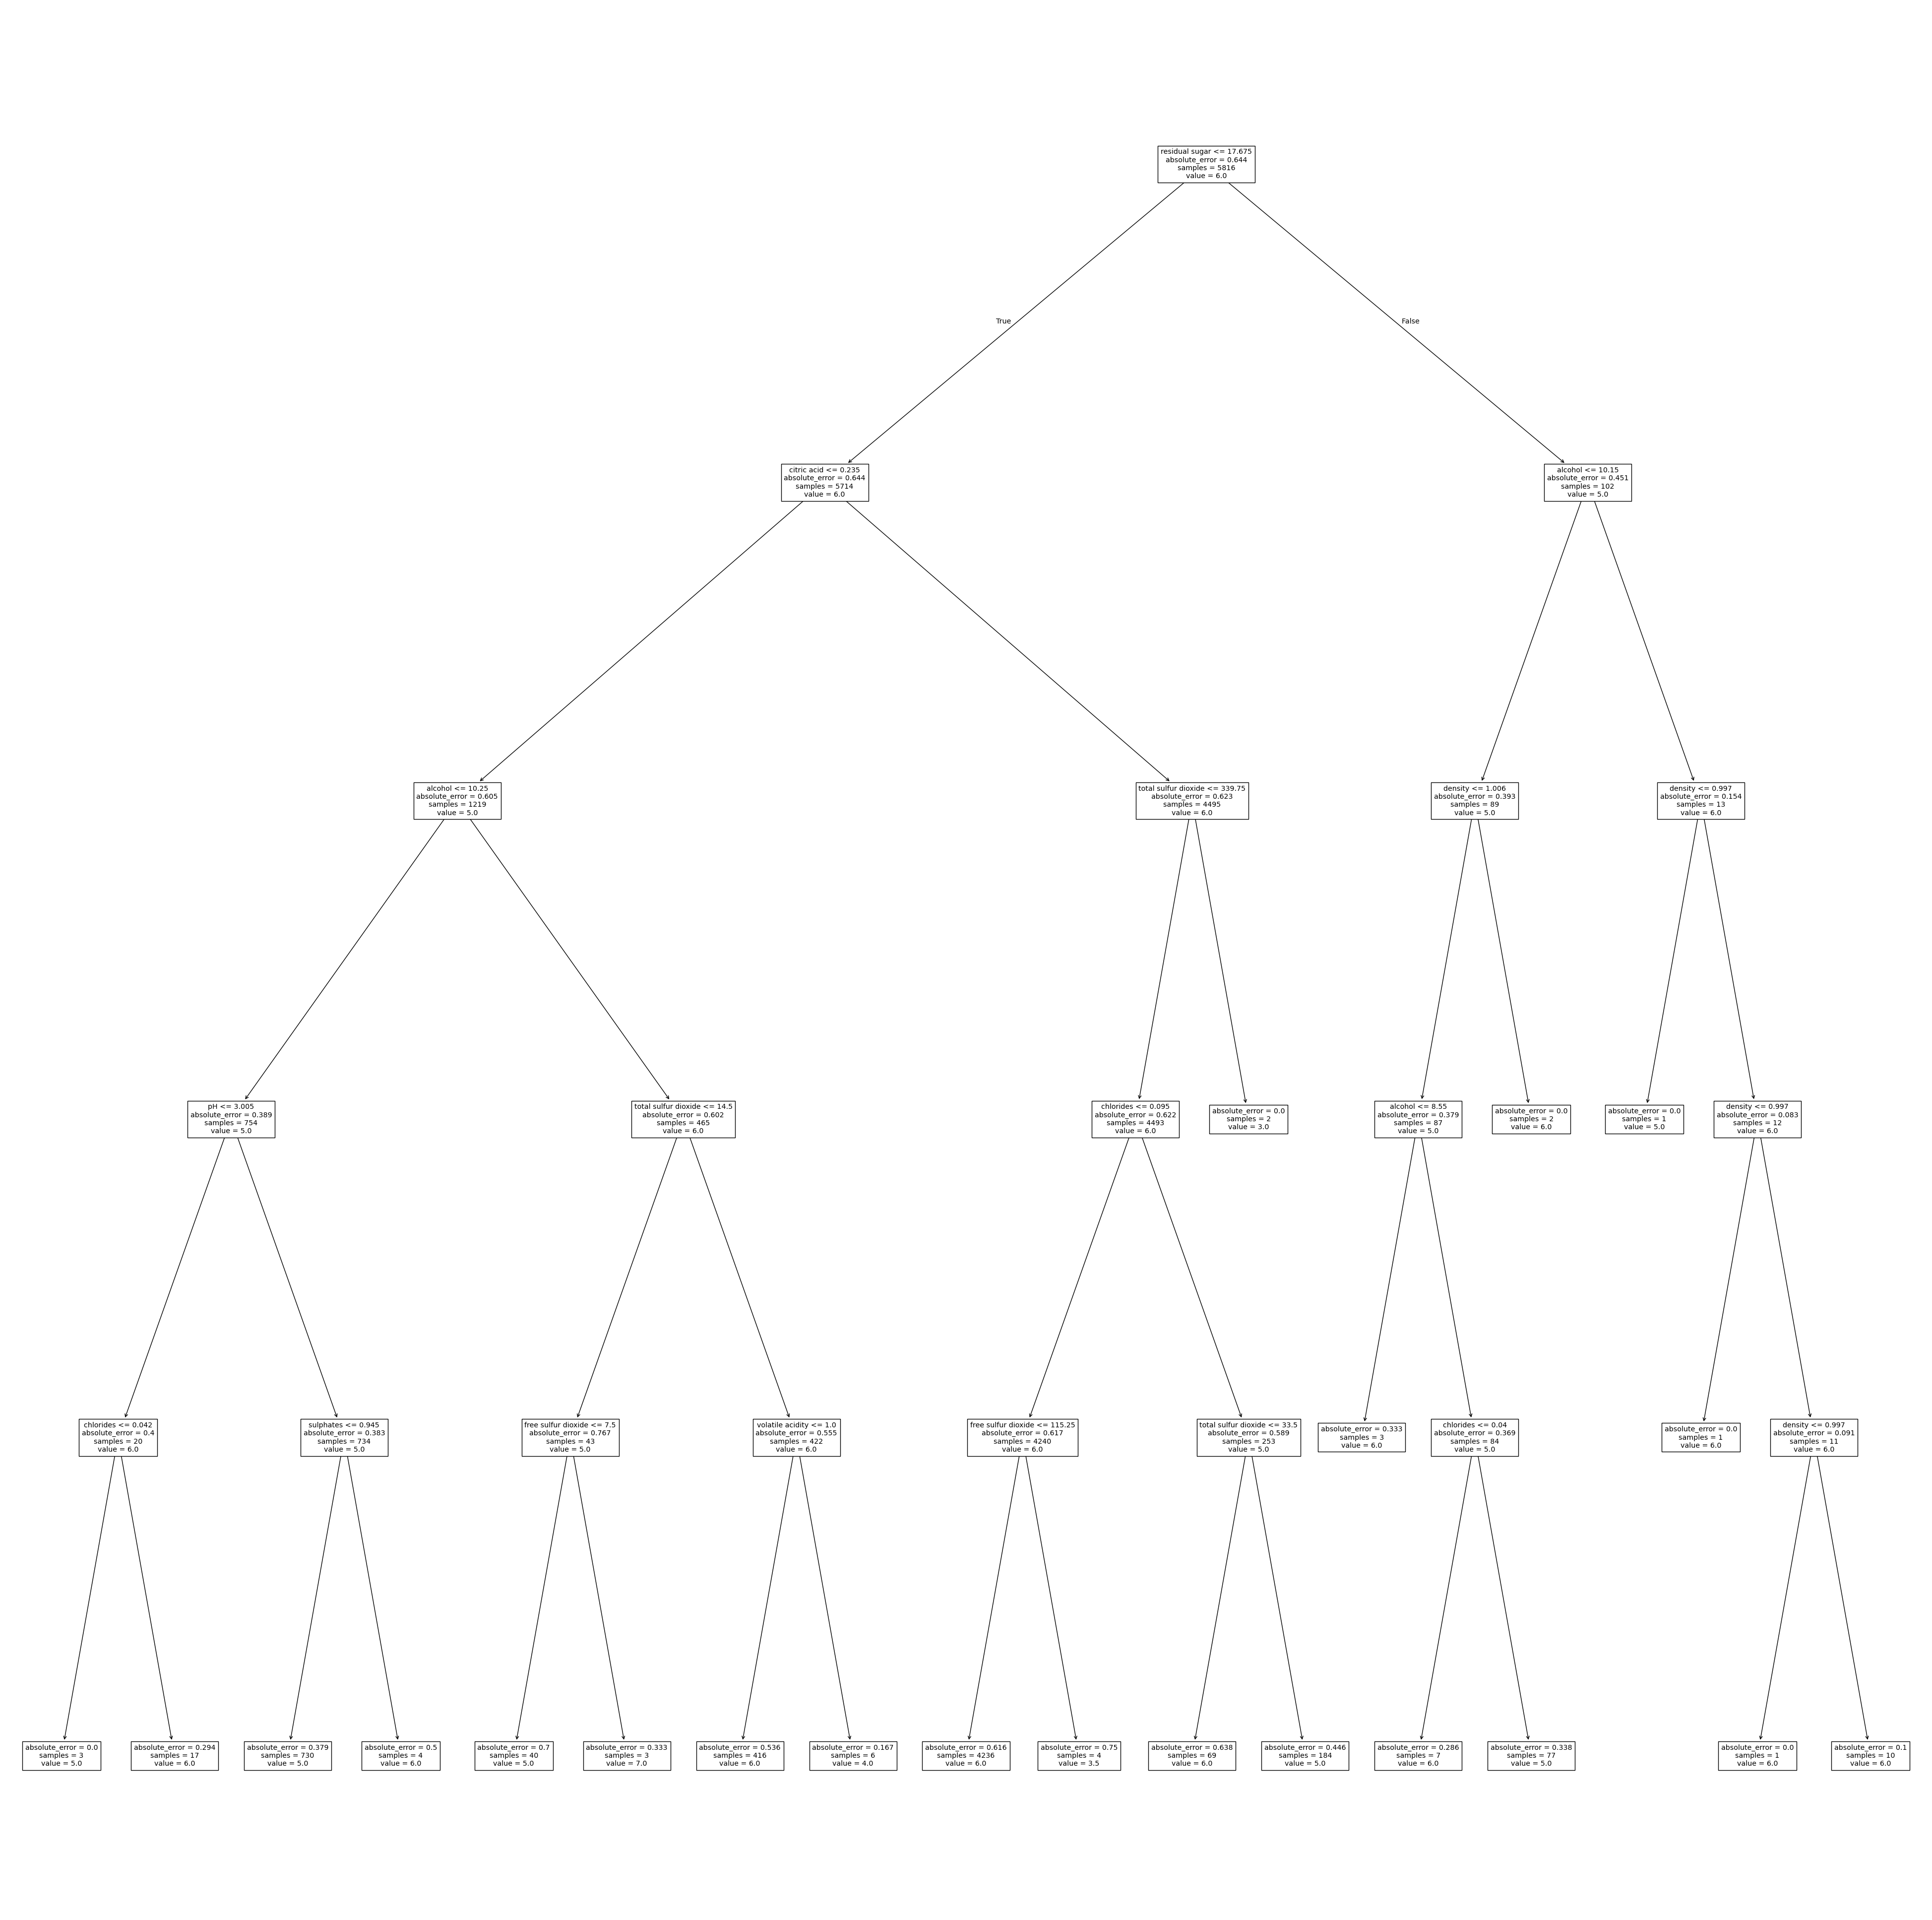

In [109]:
x = df.drop(columns=['quality'])
features = x.columns

plt.figure(figsize=(50,50))
plot_tree(GridSearch.best_estimator_, feature_names=features)

Rules extracted from the Tree:

1.   Residual Sugar:

* Wines with high residual sugar tend to be evaluated differently. The decision tree starts by splitting the wines based on residual sugar levels, indicating that this feature is a significant factor in predicting the quality score.

2.   Citric Acid Content:

*   Lower levels of citric acid seem to be associated with certain quality predictions.

3.   Alcohol Level:

* Higher alcohol content tends to have higher quality scores. For that reason, wines with lower alcohol content are likely to receive lower scores.


4.   Chlorides:

*   Wines with higher chloride levels tend to score lower.


5.   Sulfur Dioxide:

* High levels of sulfur dioxide are often used to preserve wines, but excess levels could negatively impact quality.


6.   Citric Acid Content:

*   Lower levels of citric acid seem to be associated with certain quality predictions.

7.   Volatile Acidity:

* Higher levels of volatile acidity tend to be associated with lower-quality scores.




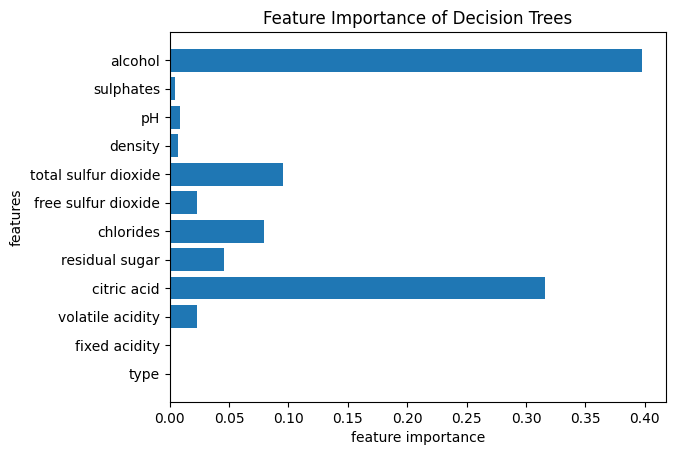

<Figure size 1000x1000 with 0 Axes>

In [110]:
feature_importance = GridSearch.best_estimator_.feature_importances_

plt.barh(features, feature_importance)
plt.title('Feature Importance of Decision Trees')
plt.xlabel('feature importance')
plt.ylabel('features')
plt.figure(figsize=(10,10))
plt.show()

From the barchart we can safely assume that our 5 most important features are in order:

1.   alcohol
2.   citric acid
3.   total sulfur dioxide
4.   chlorides
5.   residual sugar